<a href="https://colab.research.google.com/github/JeanMichelDeveloper/Training/blob/main/Analyze_images_with_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Detect edges in an image

In [41]:
#install OpenCV
!pip install opencv-contrib-python==4.6.0.66

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
#import necessary libraries
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import numpy

--2022-12-14 09:18:59--  https://miro.medium.com/fit/c/176/176/2*XyDM1Hwp8J3Ni6qTrQTqGg.png
Resolving miro.medium.com (miro.medium.com)... 162.159.153.4, 162.159.152.4, 2606:4700:7::a29f:9804, ...
Connecting to miro.medium.com (miro.medium.com)|162.159.153.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22305 (22K) [image/png]
Saving to: ‘2*XyDM1Hwp8J3Ni6qTrQTqGg.png.9’

2*XyDM1Hwp8J3Ni6qTr 100%[===================>]  21.78K  --.-KB/s    in 0s      

2022-12-14 09:18:59 (126 MB/s) - ‘2*XyDM1Hwp8J3Ni6qTrQTqGg.png.9’ saved [22305/22305]



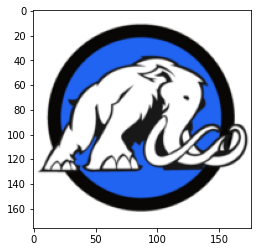

In [43]:
#download image
!wget "https://miro.medium.com/fit/c/176/176/2*XyDM1Hwp8J3Ni6qTrQTqGg.png"

image = cv2.imread("2*XyDM1Hwp8J3Ni6qTrQTqGg.png")

#show image
#plt.rcParams["figure.figsize"] = (4, 4)
plt.imshow(image)

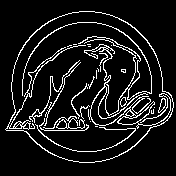

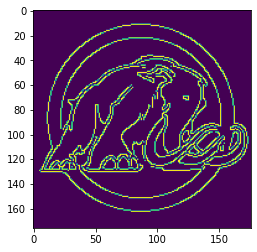

In [44]:
#detect edges
detected_edges = cv2.Canny(image, 100, 100)

#show with pyplot
plt.imshow(detected_edges)

#show with cv2
cv2_imshow(detected_edges)

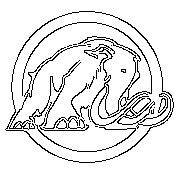

In [45]:
#show negative image
inverted_image = 255 - detected_edges

cv2_imshow(inverted_image)

In [46]:
#save new image
cv2.imwrite("Edges.png", cv2.cvtColor(inverted_image,
                                      cv2.COLOR_RGB2BGR))

True

Detect contours in an image

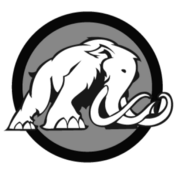

In [47]:
#convert to grey scale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

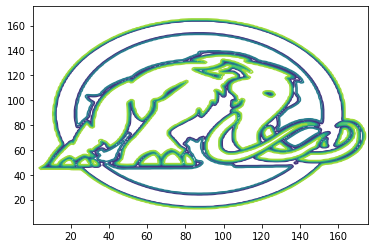

In [48]:
#find contours with pyplot
plt.contour(gray_image, origin = "image")

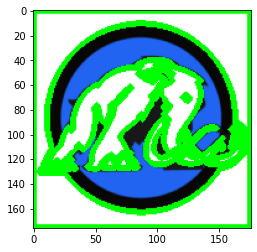

In [49]:
#find contours with opencv
ret, thresh = cv2.threshold(gray_image, 150, 255, 0)

contours, hierarchy = cv2.findContours(thresh,
                                       cv2.RETR_TREE,
                                       cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(image, contours, -1, (0, 255, 0), 3)

plt.imshow(image)

In [50]:
#download another image
!wget "https://cdn.pixabay.com/photo/2022/08/22/10/29/tihany-7403359_1280.jpg"

--2022-12-14 09:19:00--  https://cdn.pixabay.com/photo/2022/08/22/10/29/tihany-7403359_1280.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 172.64.150.12, 104.18.37.244, 2606:4700:4400::ac40:960c, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|172.64.150.12|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 256813 (251K) [binary/octet-stream]
Saving to: ‘tihany-7403359_1280.jpg.1’

tihany-7403359_1280 100%[===================>] 250.79K  --.-KB/s    in 0.08s   

2022-12-14 09:19:01 (3.18 MB/s) - ‘tihany-7403359_1280.jpg.1’ saved [256813/256813]



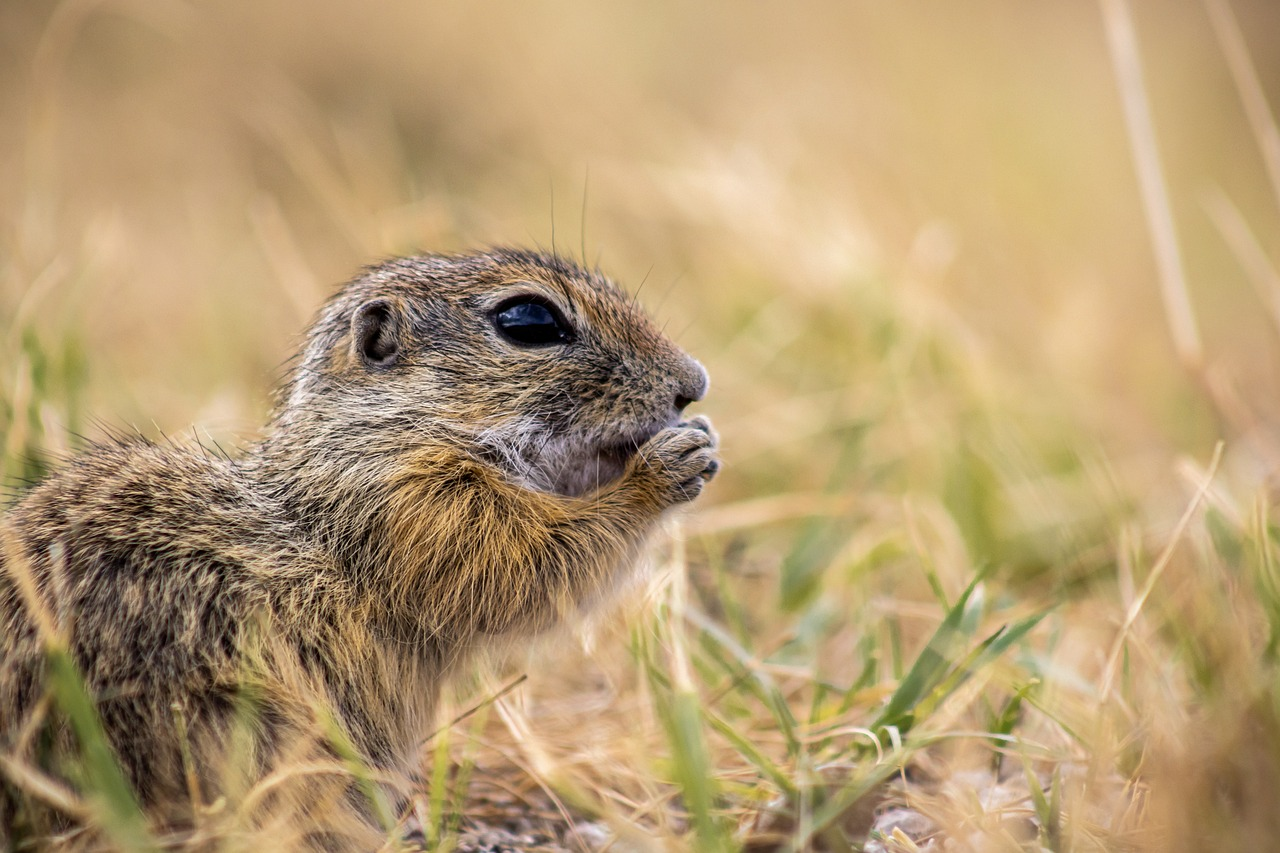

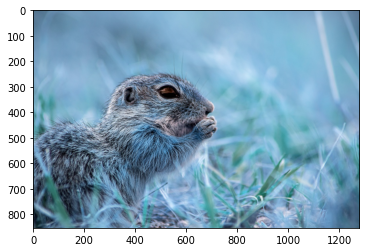

In [51]:
#show image
squirrel = cv2.imread("tihany-7403359_1280.jpg")
plt.imshow(squirrel)
cv2_imshow(squirrel)

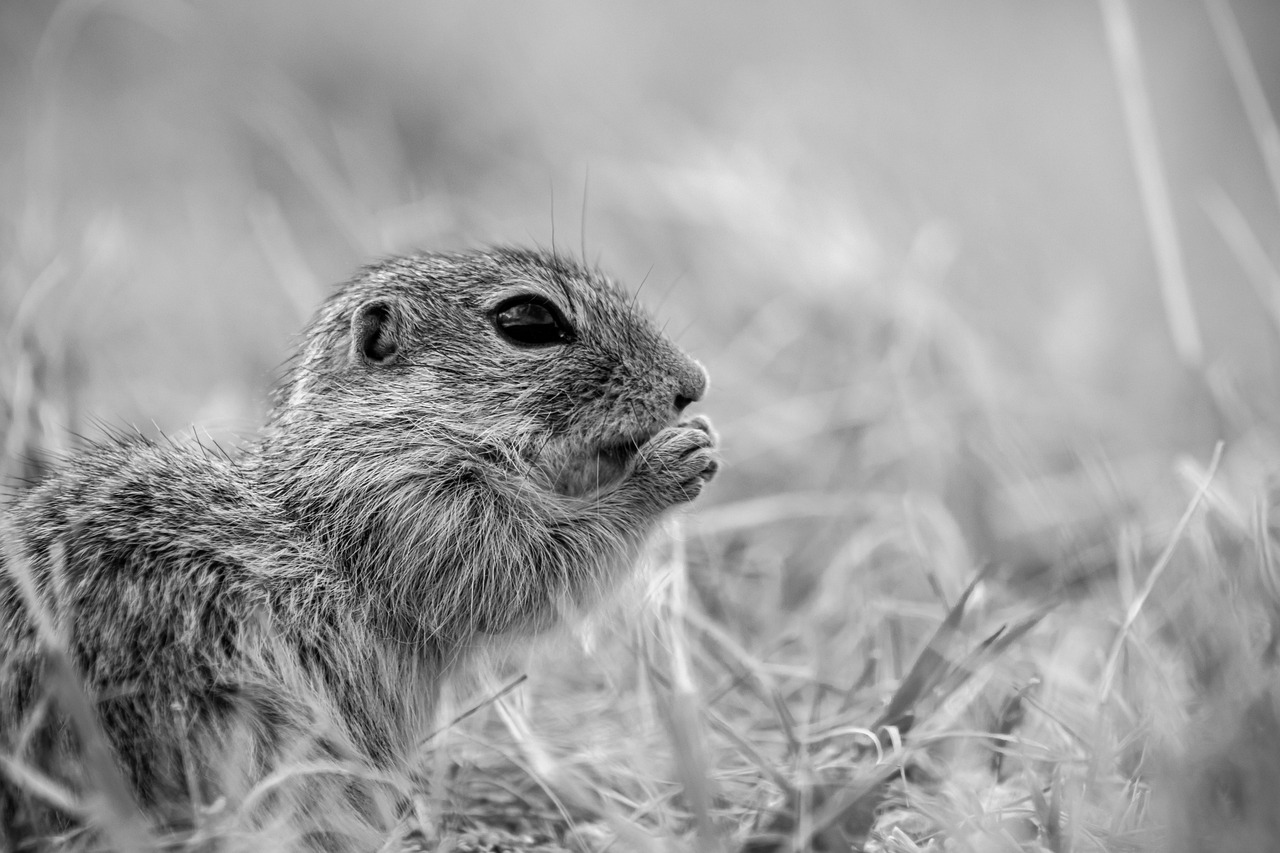

In [52]:

gray_squirrel = cv2.cvtColor(squirrel, cv2.COLOR_BGR2GRAY)

cv2_imshow(gray_squirrel)

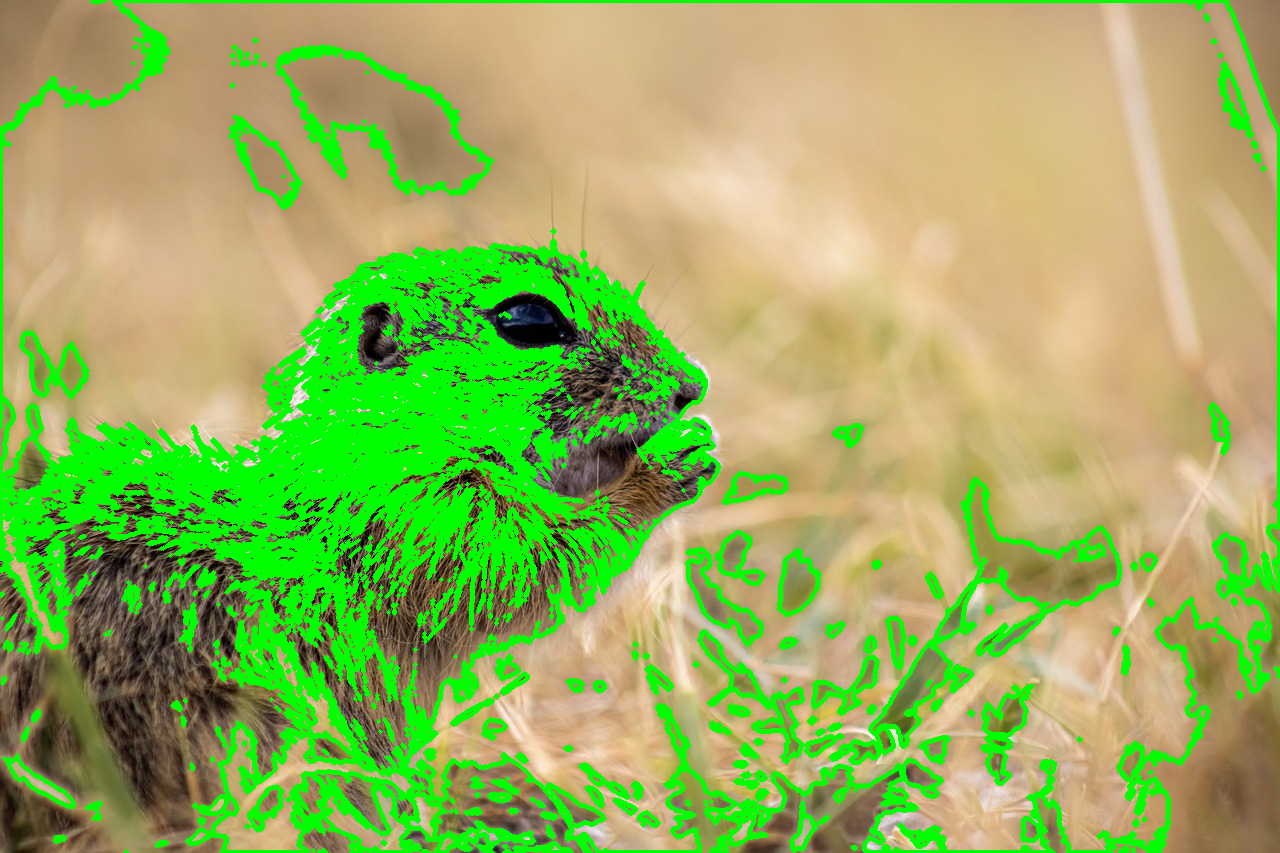

In [53]:
#detect contours on new image
ret, thresh = cv2.threshold(gray_squirrel, 150, 255, 0)

contours, hierarchy = cv2.findContours(thresh,
                                       cv2.RETR_TREE,
                                       cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(squirrel, contours, -1, (0, 255, 0), 3)

cv2_imshow(squirrel)

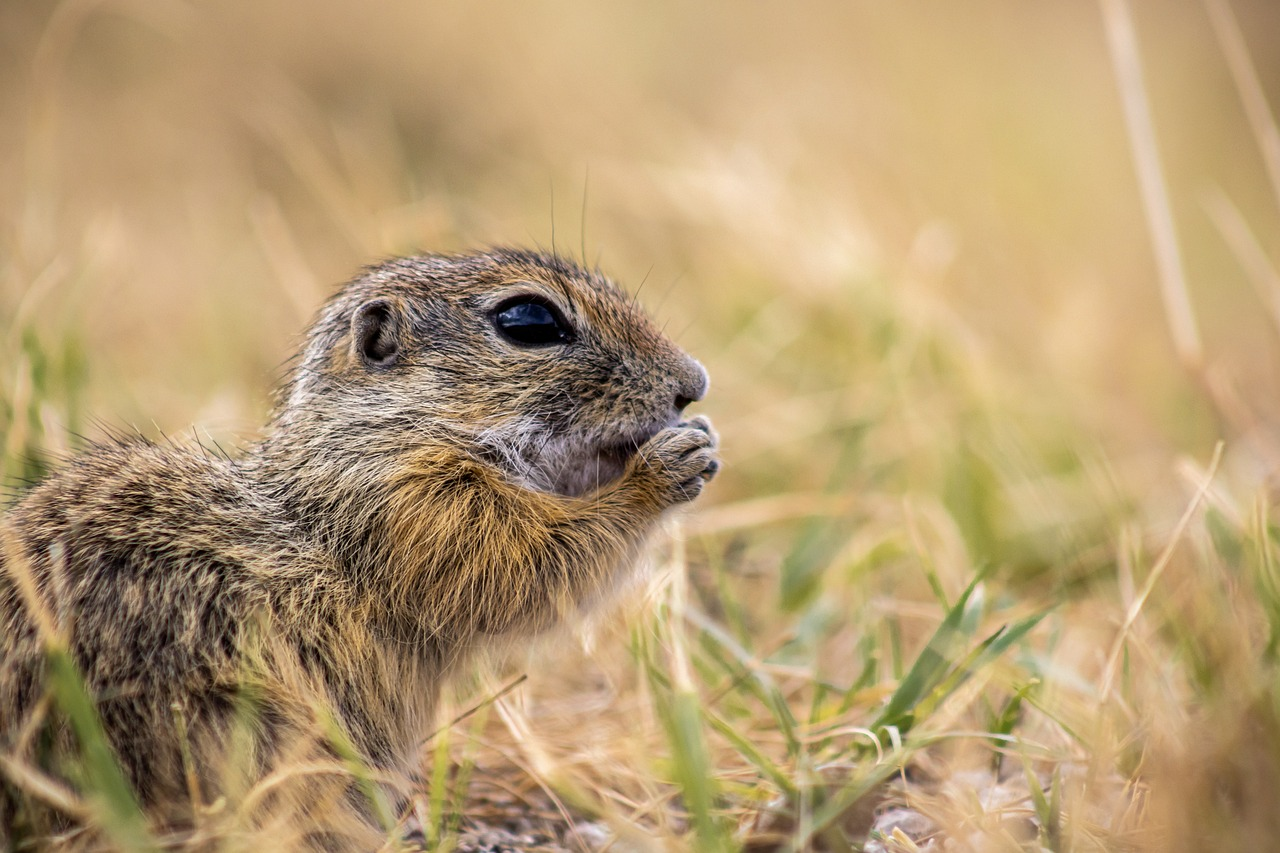

In [54]:
squirrel_image = cv2.imread("tihany-7403359_1280.jpg")
cv2_imshow(squirrel_image)

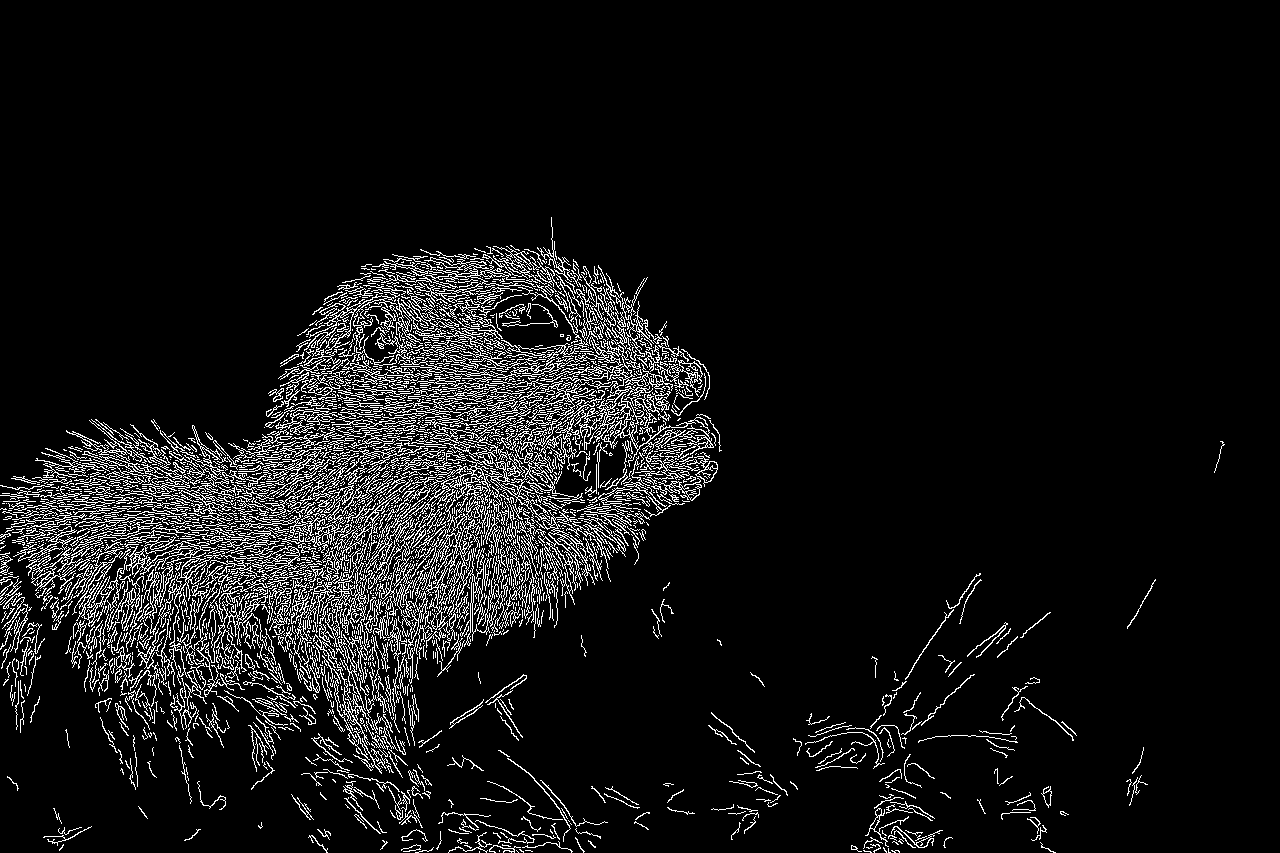

In [55]:
#detect edges on new image
squirrel_edges = cv2.Canny(squirrel_image, 100, 200)
cv2_imshow(squirrel_edges)

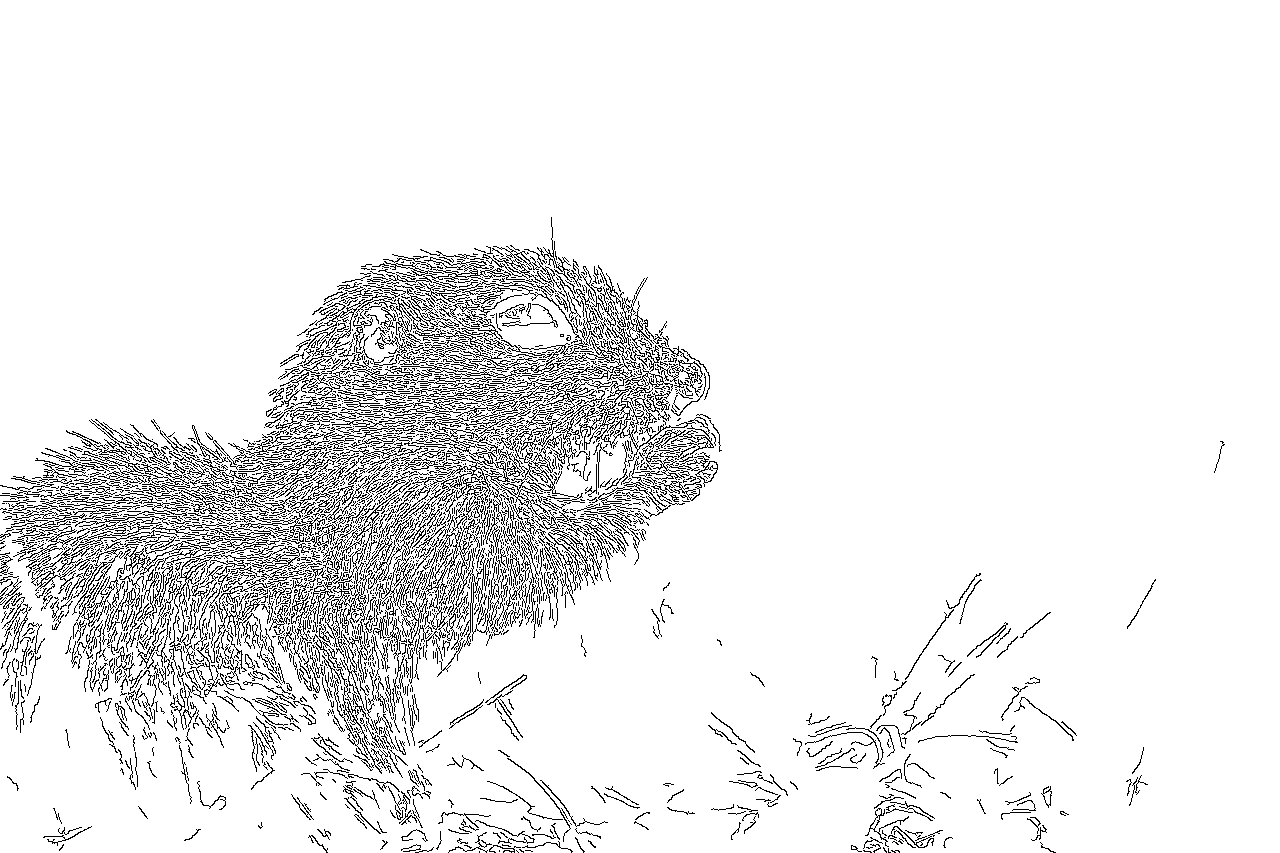

In [56]:
squirrel_inverted = 255 - squirrel_edges
cv2_imshow(squirrel_inverted)

In [57]:
cv2.imwrite("SquirrelContour.png", squirrel)

True

In [58]:
cv2.imwrite("SquirrelEdges.png", squirrel_inverted)

True

In [59]:
cv2.imwrite("LogoContours.png", image)

True

Detect corners in an image

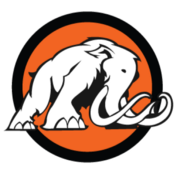

In [60]:
image = cv2.imread("2*XyDM1Hwp8J3Ni6qTrQTqGg.png")

cv2_imshow(image)

In [61]:
#resize image
#image = cv2.resize(image, (0, 0), fx = 0.75, fy = 0.75)
#cv2_imshow(image)

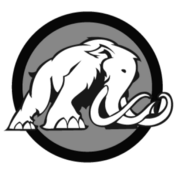

In [62]:
#convert to gray scale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_image)

In [63]:
#detect corners
maximum_corners = 100
quality_level = 0.01
minimum_distance = 10

corners = cv2.goodFeaturesToTrack(gray_image, 
                                  maximum_corners, 
                                  quality_level,
                                  minimum_distance)

corners

array([[[152., 112.]],

       [[122.,  70.]],

       [[122., 105.]],

       [[111.,  57.]],

       [[134.,  58.]],

       [[ 10., 127.]],

       [[ 40., 112.]],

       [[ 57., 127.]],

       [[ 44., 126.]],

       [[ 33., 127.]],

       [[ 57.,  90.]],

       [[ 80., 120.]],

       [[ 30., 117.]],

       [[ 67., 127.]],

       [[ 28.,  94.]],

       [[163.,  99.]],

       [[100.,  44.]],

       [[118., 121.]],

       [[ 21., 127.]],

       [[105.,  79.]],

       [[133., 115.]],

       [[109., 115.]],

       [[ 88.,  87.]],

       [[ 51.,  77.]],

       [[ 99.,  70.]],

       [[ 85.,  51.]],

       [[140., 123.]],

       [[ 97.,  57.]],

       [[ 52.,  60.]],

       [[ 63.,  76.]],

       [[150., 126.]],

       [[148.,  95.]],

       [[105.,  96.]],

       [[ 16., 111.]],

       [[ 29.,  73.]],

       [[ 82., 107.]],

       [[113.,  44.]],

       [[ 79.,  62.]],

       [[127.,  90.]],

       [[104., 126.]],

       [[ 50., 101.]],

       [[ 71., 1

In [64]:
#convert to integers
corners = numpy.int0(corners)

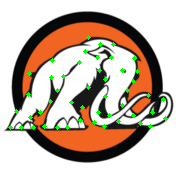

In [65]:
#draw corners on the image
radius = 2
color = (0, 255, 0)
for corner in corners:
  x, y = corner.ravel()
  cv2.circle(image, (x, y), radius, color, -1)

cv2_imshow(image)

In [66]:
cv2.imwrite("LogoCorners.png", image)

True